## WeatherPy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

614


## Perform API calls

In [92]:
# Dataframe declaration for the storage of data
columns_cityinfo = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
weather_pd = pd.DataFrame(columns = columns_cityinfo)

# Config information
base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
api_key = "&appid=" + weather_api_key

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    
    # Concatinate URL for API request
    url = base_url + city + api_key
    
    print("Processing Record " + str((cities.index(city))+1) + " of " + str(len(cities)) + " | " + city)
    
    # Get weather data
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    
    # If a city is found add it to the data frame
    if(weather_json["cod"] != "404"):
        weather_pd.loc[cities.index(city)] = [weather_json["name"], weather_json["coord"]["lon"], weather_json["coord"]["lat"], weather_json["main"]["temp_max"], weather_json["main"]["humidity"], weather_json["clouds"]["all"], weather_json["wind"]["speed"], weather_json["sys"]["country"], weather_json["dt"]]
        
    else:    
        print("City not found. Skipping...")   
        

Beginning Data Retrieval
------------------------
Processing Record 1 of 614 | upernavik
Processing Record 2 of 614 | korla
Processing Record 3 of 614 | dhoraji
Processing Record 4 of 614 | taolanaro
City not found. Skipping...
Processing Record 5 of 614 | huarmey
Processing Record 6 of 614 | busselton
Processing Record 7 of 614 | kapaa
Processing Record 8 of 614 | mataura
Processing Record 9 of 614 | komsomolskiy
Processing Record 10 of 614 | yellowknife
Processing Record 11 of 614 | cape town
Processing Record 12 of 614 | rikitea
Processing Record 13 of 614 | norman wells
Processing Record 14 of 614 | santa marta
Processing Record 15 of 614 | lykhivka
Processing Record 16 of 614 | terrell
Processing Record 17 of 614 | jumla
Processing Record 18 of 614 | jamestown
Processing Record 19 of 614 | ribeira grande
Processing Record 20 of 614 | kodiak
Processing Record 21 of 614 | billings
Processing Record 22 of 614 | mehamn
Processing Record 23 of 614 | businga
Processing Record 24 of 614 

## From raw data to data frame

In [95]:
# Convert humidity, cloudiness, and date columns to floats in order to get stats. Quartiles are done with float type variables
weather_pd = weather_pd.astype({'Humidity': 'float','Cloudiness': 'float','Date': 'float'})
weather_pd.to_csv(output_data_file)

weather_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,-56.1549,72.7868,249.83,85.0,0.0,3.40,GL,1.612038e+09
1,Korla,86.1469,41.7597,268.13,81.0,0.0,2.43,CN,1.612038e+09
2,Dhoraji,70.4500,21.7333,286.41,36.0,0.0,2.55,IN,1.612038e+09
4,Huarmey,-78.1522,-10.0681,298.37,60.0,80.0,5.88,PE,1.612038e+09
5,Busselton,115.3333,-33.6500,290.37,76.0,0.0,1.79,AU,1.612038e+09
...,...,...,...,...,...,...,...,...,...
608,Amapá,-52.0000,1.0000,298.33,94.0,99.0,1.79,BR,1.612039e+09
609,Natal,-35.2094,-5.7950,301.15,74.0,20.0,6.69,BR,1.612039e+09
610,Yashkul',45.3435,46.1711,275.01,92.0,7.0,4.55,RU,1.612039e+09
611,Tooele,-112.2983,40.5308,277.59,60.0,40.0,2.57,US,1.612039e+09


In [97]:
# Calculate Stats - All could be done with describe() - Left for reference
count = weather_pd.count().to_frame().T.rename(index={0: 'count'})
mean = weather_pd.mean().to_frame().T.rename(index={0: 'mean'})
std = weather_pd.std().to_frame().T.rename(index={0: 'std'})
min_data = weather_pd.min().to_frame().T.rename(index={0: 'min'})
quartile25 = weather_pd.quantile(0.25).to_frame().T.rename(index={0.25: '25%'})
median = weather_pd.median().to_frame().T.rename(index={0: '50%'})
quartile75 = weather_pd.quantile(0.75).to_frame().T.rename(index={0.75: '75%'})
max_data = weather_pd.max().to_frame().T.rename(index={0: 'max'})

stats = pd.concat([count,mean,std,min_data,quartile25,median,quartile75,max_data],axis=0)
stats = stats.drop(['City', 'Country'], axis=1)
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564,564,564,564,564,564,564
mean,15.8139,21.1866,282.493,71.023,51.2926,3.84989,1.61204e+09
std,90.2661,33.0936,18.8913,20.3791,40.4188,2.80182,85.4117
min,-175.2,-54.8,227.49,8,0,0.09,1.61204e+09
25%,-64.0175,-5.57375,271.48,60,3,1.7575,1.61204e+09
50%,22.5242,27.6169,288.15,76,52,3.125,1.61204e+09
75%,90.8218,47.7966,297.97,86.25,91,5.14,1.61204e+09
max,179.317,78.2186,308.53,100,100,15.95,1.61204e+09


In [96]:
# Display stats
weather_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.00000,564.000000,564.000000,5.640000e+02
mean,15.813866,21.186596,282.493067,71.02305,51.292553,3.849894,1.612038e+09
std,90.266114,33.093599,18.891303,20.37912,40.418827,2.801821,8.541166e+01
min,-175.200000,-54.800000,227.490000,8.00000,0.000000,0.090000,1.612038e+09
25%,-64.017525,-5.573750,271.480000,60.00000,3.000000,1.757500,1.612038e+09
50%,22.524200,27.616950,288.150000,76.00000,52.000000,3.125000,1.612038e+09
75%,90.821750,47.796650,297.970000,86.25000,91.000000,5.140000,1.612039e+09
max,179.316700,78.218600,308.530000,100.00000,100.000000,15.950000,1.612039e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
# If humidity is greater than 100 then add to new data frame
humidity_weather_pd = weather_pd.loc[(weather_pd["Humidity"] > 100)]
if(humidity_weather_pd.empty == True):
    print("No cities where humidity is greater than 100%")

No cities where humidity is greater than 100%


In [9]:
# Get the indices of cities that have humidity over 100%
index_list = humidity_weather_pd.index.values.tolist()
index_list

[]

In [10]:
# Eliminate rows with humidity > 100
clean_city_data = weather_pd.drop(index_list,axis=0)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,-56.1549,72.7868,250.03,87,48,3.91,GL,1612030986
1,Korla,86.1469,41.7597,268.82,80,0,2.63,CN,1612030804
2,Dhoraji,70.4500,21.7333,287.66,34,0,2.36,IN,1612030987
4,Huarmey,-78.1522,-10.0681,298.66,58,85,5.92,PE,1612030987
5,Busselton,115.3333,-33.6500,292.04,68,0,1.34,AU,1612030987
...,...,...,...,...,...,...,...,...,...
608,Amapá,-52.0000,1.0000,299.76,91,90,1.97,BR,1612031101
609,Natal,-35.2094,-5.7950,304.15,62,40,8.23,BR,1612030963
610,Yashkul',45.3435,46.1711,276.22,88,28,4.35,RU,1612031102
611,Tooele,-112.2983,40.5308,278.15,60,75,2.06,US,1612031102


## Plotting the data
-------

### Latitude vs Temperature Plot

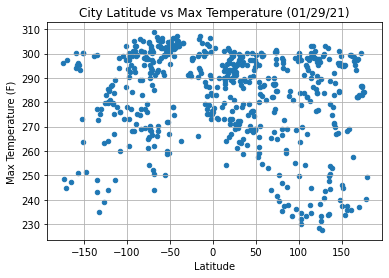

In [11]:
clean_city_data.plot.scatter(x="Lat",y="Max Temp")
plt.title("City Latitude vs Max Temperature (01/29/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_temp")
plt.show()

Cities analyzed between latitudes -50 to 50 have similar maximum temperatures, as expected since temperatures at the equator change less. Cities that are closer to the poles have greater difference between maximum temperatures. 

### Latitude vs Humidity Plot

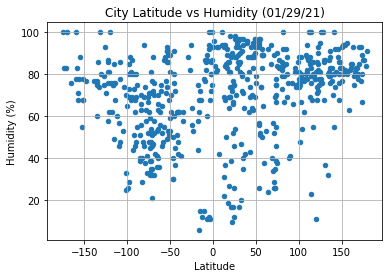

In [12]:
clean_city_data.plot.scatter(x="Lat",y="Humidity")
plt.title("City Latitude vs Humidity (01/29/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_humidity")
plt.show()

Cities that are closer to the equator are more likely to have a high humidity percentage. There is a small group close to 0 percent humidity which are cities close to or situated in very arid areas. The further from the equator we analyze, humidity percentage is higher and varies less between cities, the graph forms an upside down isosceles triangle.

### Latitude vs Cloudiness Plot

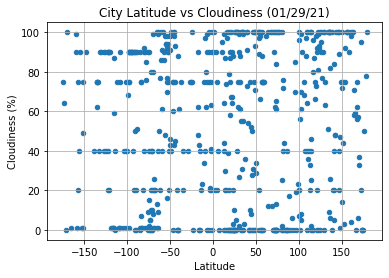

In [13]:
clean_city_data.plot.scatter(x="Lat",y="Cloudiness")
plt.title("City Latitude vs Cloudiness (01/29/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_cloudiness")
plt.show()

Most of the data comes in intervals of 20. Most cities are eithe in the 0% or the 100% cloudiness, and most of them are in the northern hemisphere. Most of the cities in the 40% cloudiness are in the southern hemisphere. The rest of cities are evenly distributed between cloudiness percentage and latitude.

### Latitude vs Wind Speed Plot

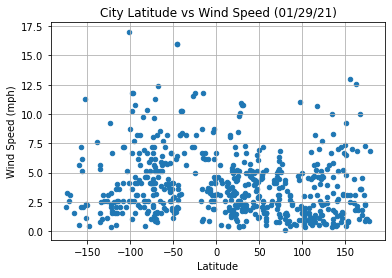

In [14]:
clean_city_data.plot.scatter(x="Lat",y="Wind Speed")
plt.title("City Latitude vs Wind Speed (01/29/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/city_latitude_vs_wind_speed")
plt.show()

Most of the cities range between 0 and 7.5 mph wind speeds.

## Linear Regression
---

Set of plots of data divided between northern and southern hemisphere.

### Northern Hemisphere - Max Temp vs Latitude Linear Regression

The correlation between latitude and temperature is: -0.19


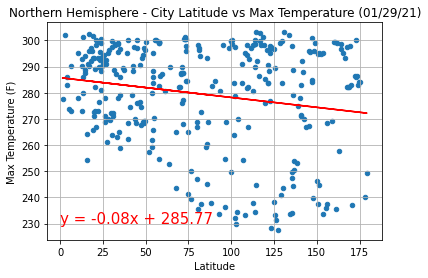

In [29]:
north_hemisphere_cdata = clean_city_data.loc[(clean_city_data["Lat"] >= 0)] 
north_hemisphere_cdata.plot.scatter(x="Lat",y="Max Temp")
plt.title("Northern Hemisphere - City Latitude vs Max Temperature (01/29/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Max Temp'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Max Temp'])
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(0,230),fontsize=15,color="red")
print('The correlation between latitude and temperature is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_temp")

plt.show()

###  Southern Hemisphere - Max Temp vs Latitude Linear Regression

The correlation between latitude and temperature is: 0.3


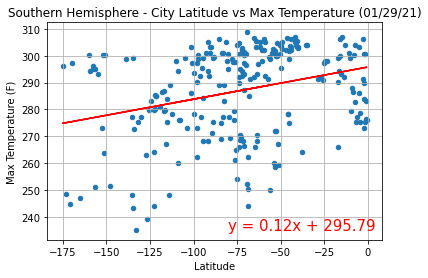

In [16]:
south_hemisphere_cdata = clean_city_data.loc[(clean_city_data["Lat"] < 0)]
south_hemisphere_cdata.plot.scatter(x="Lat",y="Max Temp")
plt.title("Southern Hemisphere - City Latitude vs Max Temperature (01/29/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Max Temp'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Max Temp'])
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-80,235),fontsize=15,color="red")
print('The correlation between latitude and temperature is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_temp")

plt.show()

Even though the correlation is low, the data shows what's expected. Maximum temperature gets lower as we approach the poles. Maximum temperature varies more between cities closer to the poles.

###  Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

The correlation between latitude and humidity is: 0.18


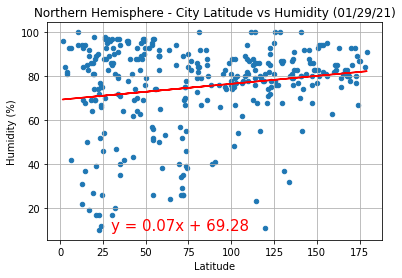

In [22]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Humidity")
plt.title("Northern Hemisphere - City Latitude vs Humidity (01/29/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Humidity'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Humidity'].astype(float))
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(30,10),fontsize=15,color="red")
print('The correlation between latitude and humidity is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_humidity")

plt.show()

###  Southern Hemisphere - Himidity (%) vs Latitude Linear Regression

The correlation between latitude and temperature is: -0.17


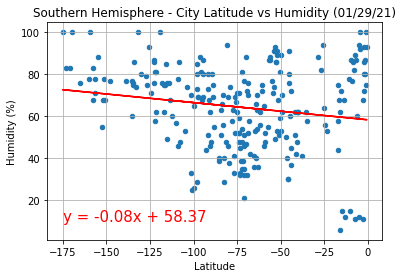

In [21]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Humidity")
plt.title("Southern Hemisphere - City Latitude vs Humidity (01/29/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Humidity'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Humidity'].astype(float))
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-175,10),fontsize=15,color="red")
print('The correlation between latitude and humidity is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_humidity")

plt.show()

The data shows that humidity tends to increase the closer the cities are to the poles. There's a wide range of humidity for cities closer to the equator.

###  Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

The correlation between latitude and cloudiness is: 0.09


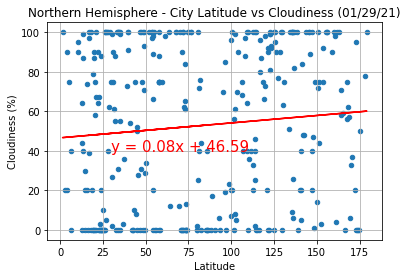

In [25]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Northern Hemisphere - City Latitude vs Cloudiness (01/29/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Cloudiness'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Cloudiness'].astype(float))
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(30,40),fontsize=15,color="red")
print('The correlation between latitude and cloudiness is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_coudiness")

plt.show()

###  Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

The correlation between latitude and cloudiness is: 0.02


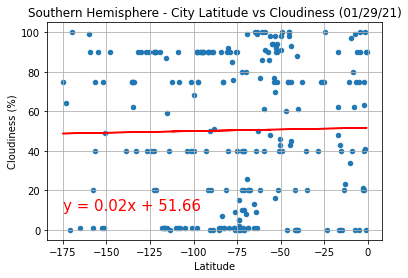

In [26]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Southern Hemisphere - City Latitude vs Cloudiness (01/29/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Cloudiness'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Cloudiness'].astype(float))
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-175,10),fontsize=15,color="red")
print('The correlation between latitude and cloudiness is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_cloudiness")

plt.show()

The data does not show correlation between latitude and cloudiness.

###  Northern Hemisphere - Wind Speeds (mph) vs Latitude Linear Regression

The correlation between latitude and wind speed is: -0.03


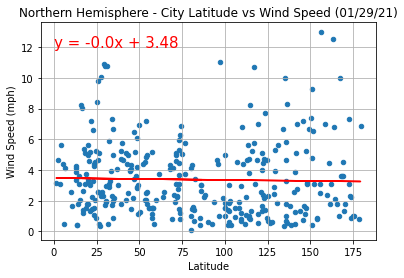

In [28]:
north_hemisphere_cdata.plot.scatter(x="Lat",y="Wind Speed")
plt.title("Northern Hemisphere - City Latitude vs Wind Speed (01/29/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(north_hemisphere_cdata['Lat'],north_hemisphere_cdata['Wind Speed'])[0],2)
regression = st.linregress(north_hemisphere_cdata['Lat'], north_hemisphere_cdata['Wind Speed'])
y_eq = regression[0]*north_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(north_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(0,12),fontsize=15,color="red")
print('The correlation between latitude and wind speed is: ' + str(correlation))
plt.savefig("output_data/north-city_latitude_vs_windspeed")

plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

The correlation between latitude and wind speed is: 0.16


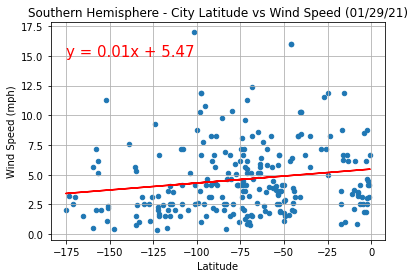

In [31]:
south_hemisphere_cdata.plot.scatter(x="Lat",y="Wind Speed")
plt.title("Southern Hemisphere - City Latitude vs Wind Speed (01/29/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Regression line
correlation = round(st.pearsonr(south_hemisphere_cdata['Lat'],south_hemisphere_cdata['Wind Speed'])[0],2)
regression = st.linregress(south_hemisphere_cdata['Lat'], south_hemisphere_cdata['Wind Speed'])
y_eq = regression[0]*south_hemisphere_cdata['Lat'] + regression[1]
y_func = "y = " + str(round(regression[0],2)) + "x + " + str(round(regression[1],2))

plt.plot(south_hemisphere_cdata['Lat'],y_eq,color='red')
plt.annotate(y_func,(-175,15),fontsize=15,color="red")
print('The correlation between latitude and wind speed is: ' + str(correlation))
plt.savefig("output_data/south-city_latitude_vs_windspeed")

plt.show()

Northern hemisphere data does not show correlation between latitude and wind speed, whereas, southern hemisphere data shows some correlation between the decrease of wind speed and cities closer to the south pole.